#Profile Submission

> Nama : Hamidan Z Wijasena

> Email : hamidanzaneddinewijasena@gmail.com


#Submission-NLP: Klasifikasi Teks pada Dataset BBC News menggunakan metode LSTM
Requirements 

1. Dataset yang akan dipakai bebas, namun minimal memiliki 10000 sampel.

2. Harus menggunakan LSTM dalam arsitektur model.

3. Validation set sebesar 20% dari total dataset.

4. Model harus menggunakan model sequential.

5. Harus menggunakan Learning Rate pada Optimizer.

6. MAE < 10% skala data.

> Dataset : https://www.kaggle.com/mahirkukreja/delhi-weather-data


In [26]:
#Import dataset dari gdrive

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [27]:
# Import Library yang akan digunakan

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from keras.layers import Dense, LSTM

# Info Dataset

> https://www.kaggle.com/mahirkukreja/delhi-weather-data

In [28]:
# Import Dataset Time Series

dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Latihan/Time-Series/testset.csv')
dataframe.head(11)

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
5,19961101-17:00,Smoke,12.0,0,0,NaN,56.0,NaN,1011.0,0,0,21.0,0,0,NaN,0.0,North,NaN,NaN,NaN
6,19961101-18:00,Smoke,13.0,0,0,NaN,60.0,NaN,1010.0,0,0,21.0,0,0,0.8,0.0,North,NaN,NaN,0.0
7,19961101-19:00,Smoke,13.0,0,0,NaN,60.0,NaN,-9999.0,0,0,21.0,0,0,NaN,0.0,North,NaN,NaN,NaN
8,19961101-20:00,Smoke,13.0,0,0,NaN,68.0,NaN,-9999.0,0,0,19.0,0,0,NaN,0.0,North,NaN,NaN,NaN
9,19961101-21:00,Smoke,13.0,0,0,NaN,68.0,NaN,1010.0,0,0,19.0,0,0,NaN,0.0,North,NaN,NaN,NaN


In [29]:
# Ujung dataset

dataframe.tail(11)

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
100979,20170423-12:00,Haze,12.0,0,0,NaN,12.0,NaN,999.0,0,0,39.0,0,0,4.0,270.0,West,NaN,NaN,9.3
100980,20170423-15:00,Haze,18.0,0,0,NaN,32.0,NaN,1001.0,0,0,33.0,0,0,2.0,NaN,NaN,NaN,NaN,0.0
100981,20170423-18:00,Haze,19.0,0,0,NaN,41.0,NaN,1002.0,0,0,30.0,0,0,2.0,NaN,NaN,NaN,NaN,0.0
100982,20170423-21:00,Haze,14.0,0,0,NaN,30.0,NaN,1002.0,0,0,29.0,0,0,2.0,320.0,NW,NaN,NaN,14.8
100983,20170424-00:00,Haze,15.0,0,0,NaN,40.0,NaN,1004.0,0,0,26.0,0,0,2.0,290.0,WNW,NaN,NaN,11.1
100984,20170424-03:00,Haze,16.0,0,0,NaN,38.0,NaN,1006.0,0,0,28.0,0,0,4.0,0.0,North,NaN,NaN,14.8
100985,20170424-06:00,Haze,17.0,0,0,NaN,25.0,NaN,1005.0,0,0,34.0,0,0,4.0,320.0,NW,NaN,NaN,11.1
100986,20170424-09:00,Haze,14.0,0,0,NaN,16.0,NaN,1003.0,0,0,38.0,0,0,4.0,320.0,NW,NaN,NaN,22.2
100987,20170424-12:00,Haze,12.0,0,0,NaN,14.0,NaN,1002.0,0,0,36.0,0,0,4.0,270.0,West,NaN,NaN,18.5
100988,20170424-15:00,Haze,15.0,0,0,NaN,27.0,NaN,1004.0,0,0,32.0,0,0,2.0,320.0,NW,NaN,NaN,3.7


In [30]:
# Total data

dataframe.shape

(100990, 20)

In [31]:
print(dataframe.columns)
print(dataframe.shape)
print(dataframe.info())

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')
(100990, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm  

In [32]:
# Persebaran data

dataframe.isnull().sum()

datetime_utc         0
 _conds             72
 _dewptm           621
 _fog                0
 _hail               0
 _heatindexm     71835
 _hum              757
 _precipm       100990
 _pressurem        232
 _rain               0
 _snow               0
 _tempm            673
 _thunder            0
 _tornado            0
 _vism            4428
 _wdird          14755
 _wdire          14755
 _wgustm         99918
 _windchillm    100411
 _wspdm           2358
dtype: int64

# Pre-Processing Dataset
>https://towardsdatascience.com/common-time-series-data-analysis-methods-and-forecasting-models-in-python-f0565b68a3d8

In [33]:
# Mengconvert Format datetime_utc ke Datetime

dataframe['datetime_utc'] = pd.to_datetime(dataframe['datetime_utc'])
dataframe['datetime_utc'].head()

0   1996-11-01 11:00:00
1   1996-11-01 12:00:00
2   1996-11-01 13:00:00
3   1996-11-01 14:00:00
4   1996-11-01 16:00:00
Name: datetime_utc, dtype: datetime64[ns]

In [34]:
# Mengisi lossdata dengan nilai mean

dataframe[' _tempm'].fillna(dataframe[' _tempm'].mean(), inplace=True)
dataframe = dataframe[['datetime_utc',' _tempm' ]]

# Merubah nama kolom
dataframe.rename(columns={'datetime_utc':'date',' _tempm':'tmp'}, inplace=True)
dataframe.head(11)

,date,tmp
0,1996-11-01 11:00:00,30.0
1,1996-11-01 12:00:00,28.0
2,1996-11-01 13:00:00,24.0
3,1996-11-01 14:00:00,24.0
4,1996-11-01 16:00:00,23.0
5,1996-11-01 17:00:00,21.0
6,1996-11-01 18:00:00,21.0
7,1996-11-01 19:00:00,21.0
8,1996-11-01 20:00:00,19.0
9,1996-11-01 21:00:00,19.0


In [35]:
# Mengecek data kembali 

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    100990 non-null  datetime64[ns]
 1   tmp     100990 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.5 MB


In [36]:
dataframe2=dataframe[['date','tmp']].copy()
dataframe2.set_index('date', inplace= True)

# Resampling data menjadi mean tiap pada tanggal
dataframe2 =dataframe2.resample('D').mean()
dataframe2.head(6)

,tmp
date,
1996-11-01,22.333333
1996-11-02,22.916667
1996-11-03,21.791667
1996-11-04,22.722222
1996-11-05,27.800000
1996-11-06,21.937500


In [37]:
dataframe2.isnull().sum()

tmp    141
dtype: int64

In [38]:
# Isi data kosong dengan nilai mean

dataframe2['tmp'].fillna(dataframe2['tmp'].mean(), inplace=True)

# Cek data
dataframe2.isnull().sum()

tmp    0
dtype: int64

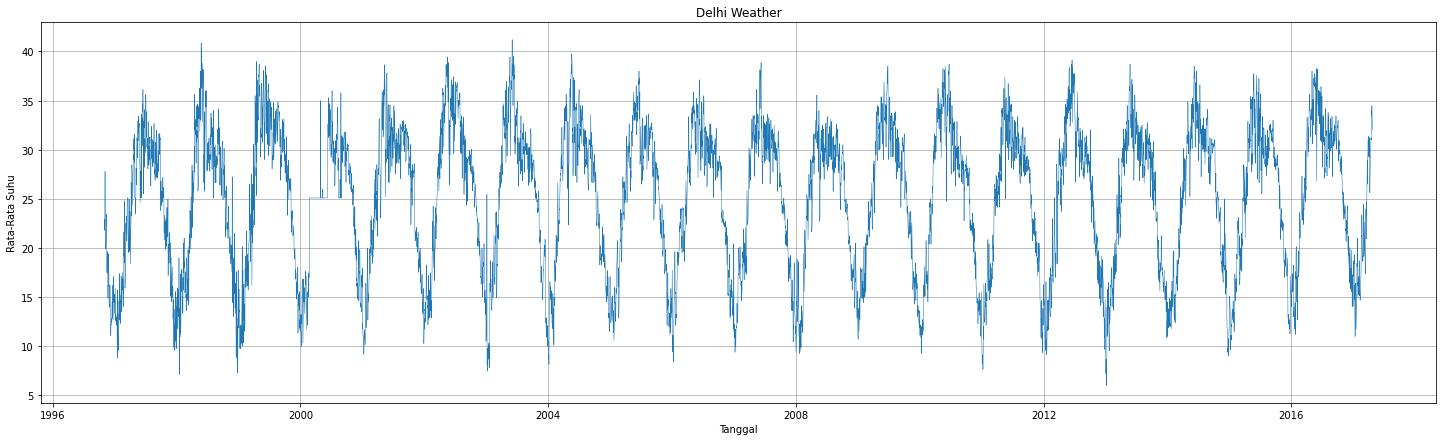

In [39]:
# Visualisasi dataset

plt.figure(figsize=(25, 7))
plt.plot(dataframe2, linewidth=.5)
plt.grid()
plt.title("Delhi Weather")
plt.xlabel('Tanggal')
plt.ylabel('Rata-Rata Suhu')
plt.show()


# Model Building

In [40]:
# Data Value

date = dataframe['date'].values
temp = dataframe['tmp'].values

In [41]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [42]:
# Membagi Dataset Training 80% dan Validation 20%

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(temp, date, test_size = 0.2, random_state = 0 , shuffle=False)
print(len(x_train), len(x_test))

80792 20198


In [43]:
# Model NN
from keras.layers import Dense, LSTM

data_train = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=1000)
data_test = windowed_dataset(x_test, window_size=60, batch_size=100, shuffle_buffer=1000)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [44]:
# Model Optimizer

optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [45]:
Mae = (dataframe2['tmp'].max() - dataframe2['tmp'].min()) * 10/100
print(Mae)

3.5210526315789474


In [46]:
# Callback

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')< Mae):
      print("\nMAE of the model < 10% of data scale")
      self.model.stop_training = True
callbacks = myCallback()

In [47]:
# Fitting Model 

tf.keras.backend.set_floatx('float64')
history = model.fit(data_train ,epochs=100, validation_data=data_test, callbacks=[callbacks])

Epoch 1/100
808/808 [==============================] - 29s 32ms/step - loss: 11.2271 - mae: 11.7164 - val_loss: 5.7562 - val_mae: 6.2345
Epoch 2/100
808/808 [==============================] - 25s 31ms/step - loss: 5.7379 - mae: 6.2199 - val_loss: 4.2262 - val_mae: 4.7051
Epoch 3/100
808/808 [==============================] - 26s 32ms/step - loss: 3.8405 - mae: 4.3153 - val_loss: 3.8477 - val_mae: 4.3243
Epoch 4/100
808/808 [==============================] - 26s 32ms/step - loss: 3.5706 - mae: 4.0438 - val_loss: 3.7803 - val_mae: 4.2549
Epoch 5/100
808/808 [==============================] - 26s 31ms/step - loss: 3.4334 - mae: 3.9057 - val_loss: 3.8438 - val_mae: 4.3169
Epoch 6/100
808/808 [==============================] - 26s 31ms/step - loss: 3.3275 - mae: 3.7988 - val_loss: 3.7641 - val_mae: 4.2416
Epoch 7/100
808/808 [==============================] - 26s 32ms/step - loss: 3.2406 - mae: 3.7110 - val_loss: 3.7056 - val_mae: 4.1828
Epoch 8/100
808/808 [==============================] 

# Model Evaluation

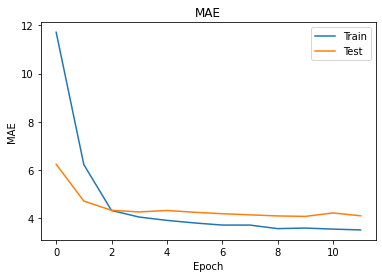

In [48]:
# Plot MAE

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

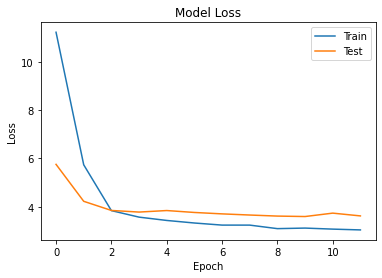

In [49]:
# Plot Loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()